In [94]:
# The counselor of the firm is supposed check whether the student will get an admission or not 
# based on his/her GRE score and Academic Score. So to help the counselor to take appropriate 
# decisions build a machine learning model classifier using Decision tree to predict whether a 
# student will get admission or not. 

# Classification using Machine Learning

# a) Perform data-preparation (Train-Test Split)
# b) Apply Decision tree classification Algorithm
# c) Evaluate Model.

In [95]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [96]:
# Loading the data
df = pd.read_csv('Dataset_Admission_Predict.csv')

# first 5 rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [97]:
# last 5 rows
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [98]:
# a) Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if necessary.
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [99]:
df.isnull().values.any()

False

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [101]:
# Removing Space 
df.columns = [c.replace(' ', '') for c in df.columns]

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceofAdmit     400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [103]:
(df==0).sum()

SerialNo.             0
GREScore              0
TOEFLScore            0
UniversityRating      0
SOP                   0
LOR                   0
CGPA                  0
Research            181
ChanceofAdmit         0
dtype: int64

In [104]:
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [105]:
(df==0).sum()

SerialNo.             0
GREScore              0
TOEFLScore            0
UniversityRating      0
SOP                   0
LOR                   0
CGPA                  0
Research            181
ChanceofAdmit       272
dtype: int64

In [106]:
(df==1).sum()

SerialNo.             1
GREScore              0
TOEFLScore            0
UniversityRating     26
SOP                   6
LOR                   1
CGPA                  0
Research            219
ChanceofAdmit       128
dtype: int64

In [107]:
# Countplot of Admission Chances

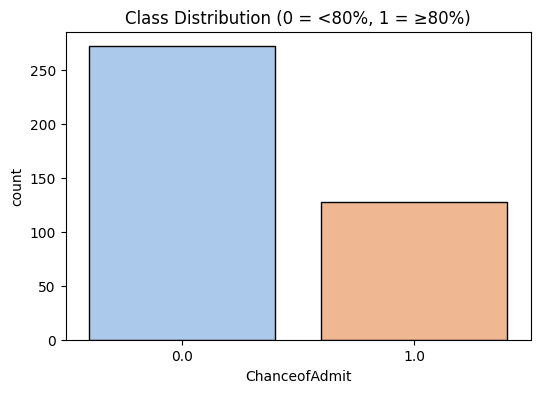

In [108]:
plt.figure(figsize=(6,4))
sns.countplot(x='ChanceofAdmit', hue='ChanceofAdmit', data=df, palette='pastel', edgecolor='black', legend=False)
plt.title("Class Distribution (0 = <80%, 1 = ≥80%)")
plt.show()


In [109]:
# Feature Correlation Heatmap

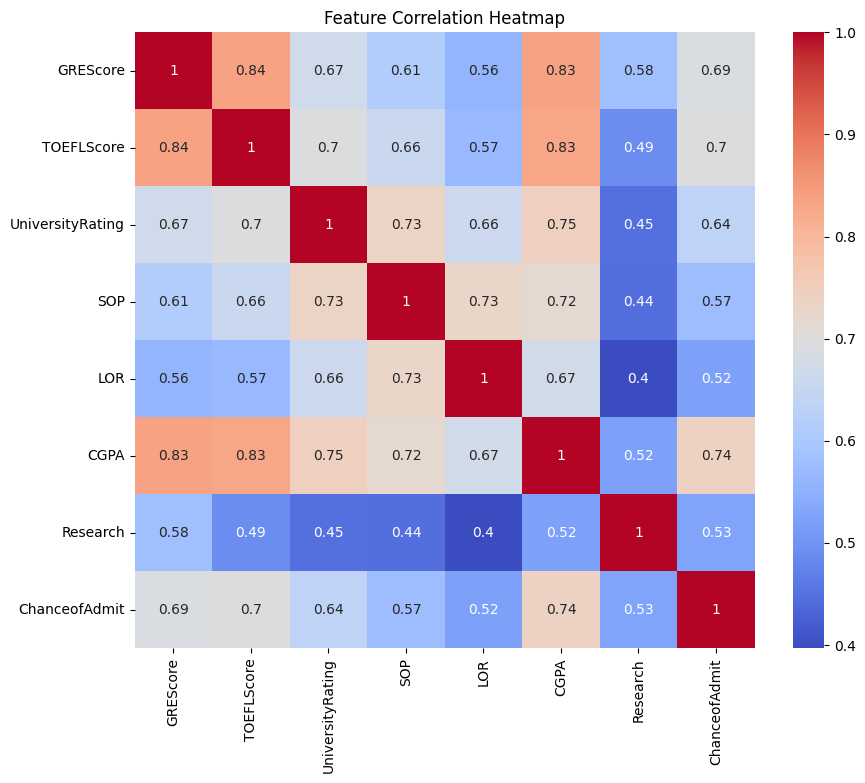

In [110]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('SerialNo.', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [111]:
# b) Perform data-preparation (Train-Test Split)

## x = Indepent Variable
## y = Dependent Variable

X = df.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = df['ChanceofAdmit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [112]:
# c) Apply Decision tree classification Algorithm

# Creating Decision Tree classifer object
clf = DecisionTreeClassifier()

# Training Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predicting for the test data
y_pred = clf.predict(X_test)


Confusion matrix:

[[72  3]
 [ 8 17]]


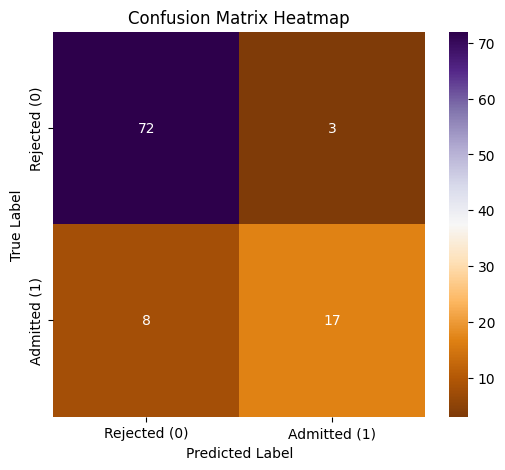

In [113]:
# d) Evaluate Model.
print("Confusion matrix:\n")
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Create heatmap visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, 
            annot=True, 
            cmap='PuOr',     # Color scheme
            xticklabels=['Rejected (0)', 'Admitted (1)'], 
            yticklabels=['Rejected (0)', 'Admitted (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [114]:
# Calculating Accuracy, Precision, Recall, F1 Score

print("1. Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(y_test, y_pred))

1. Accuracy Score: 0.89
2. Precision Score: 0.85
3. Recall Score: 0.68
4. f1 Score: 0.7555555555555555


In [115]:
print(y_test)

218    1.0
250    0.0
262    0.0
185    1.0
339    1.0
      ... 
396    1.0
338    1.0
290    0.0
75     0.0
37     0.0
Name: ChanceofAdmit, Length: 100, dtype: float64


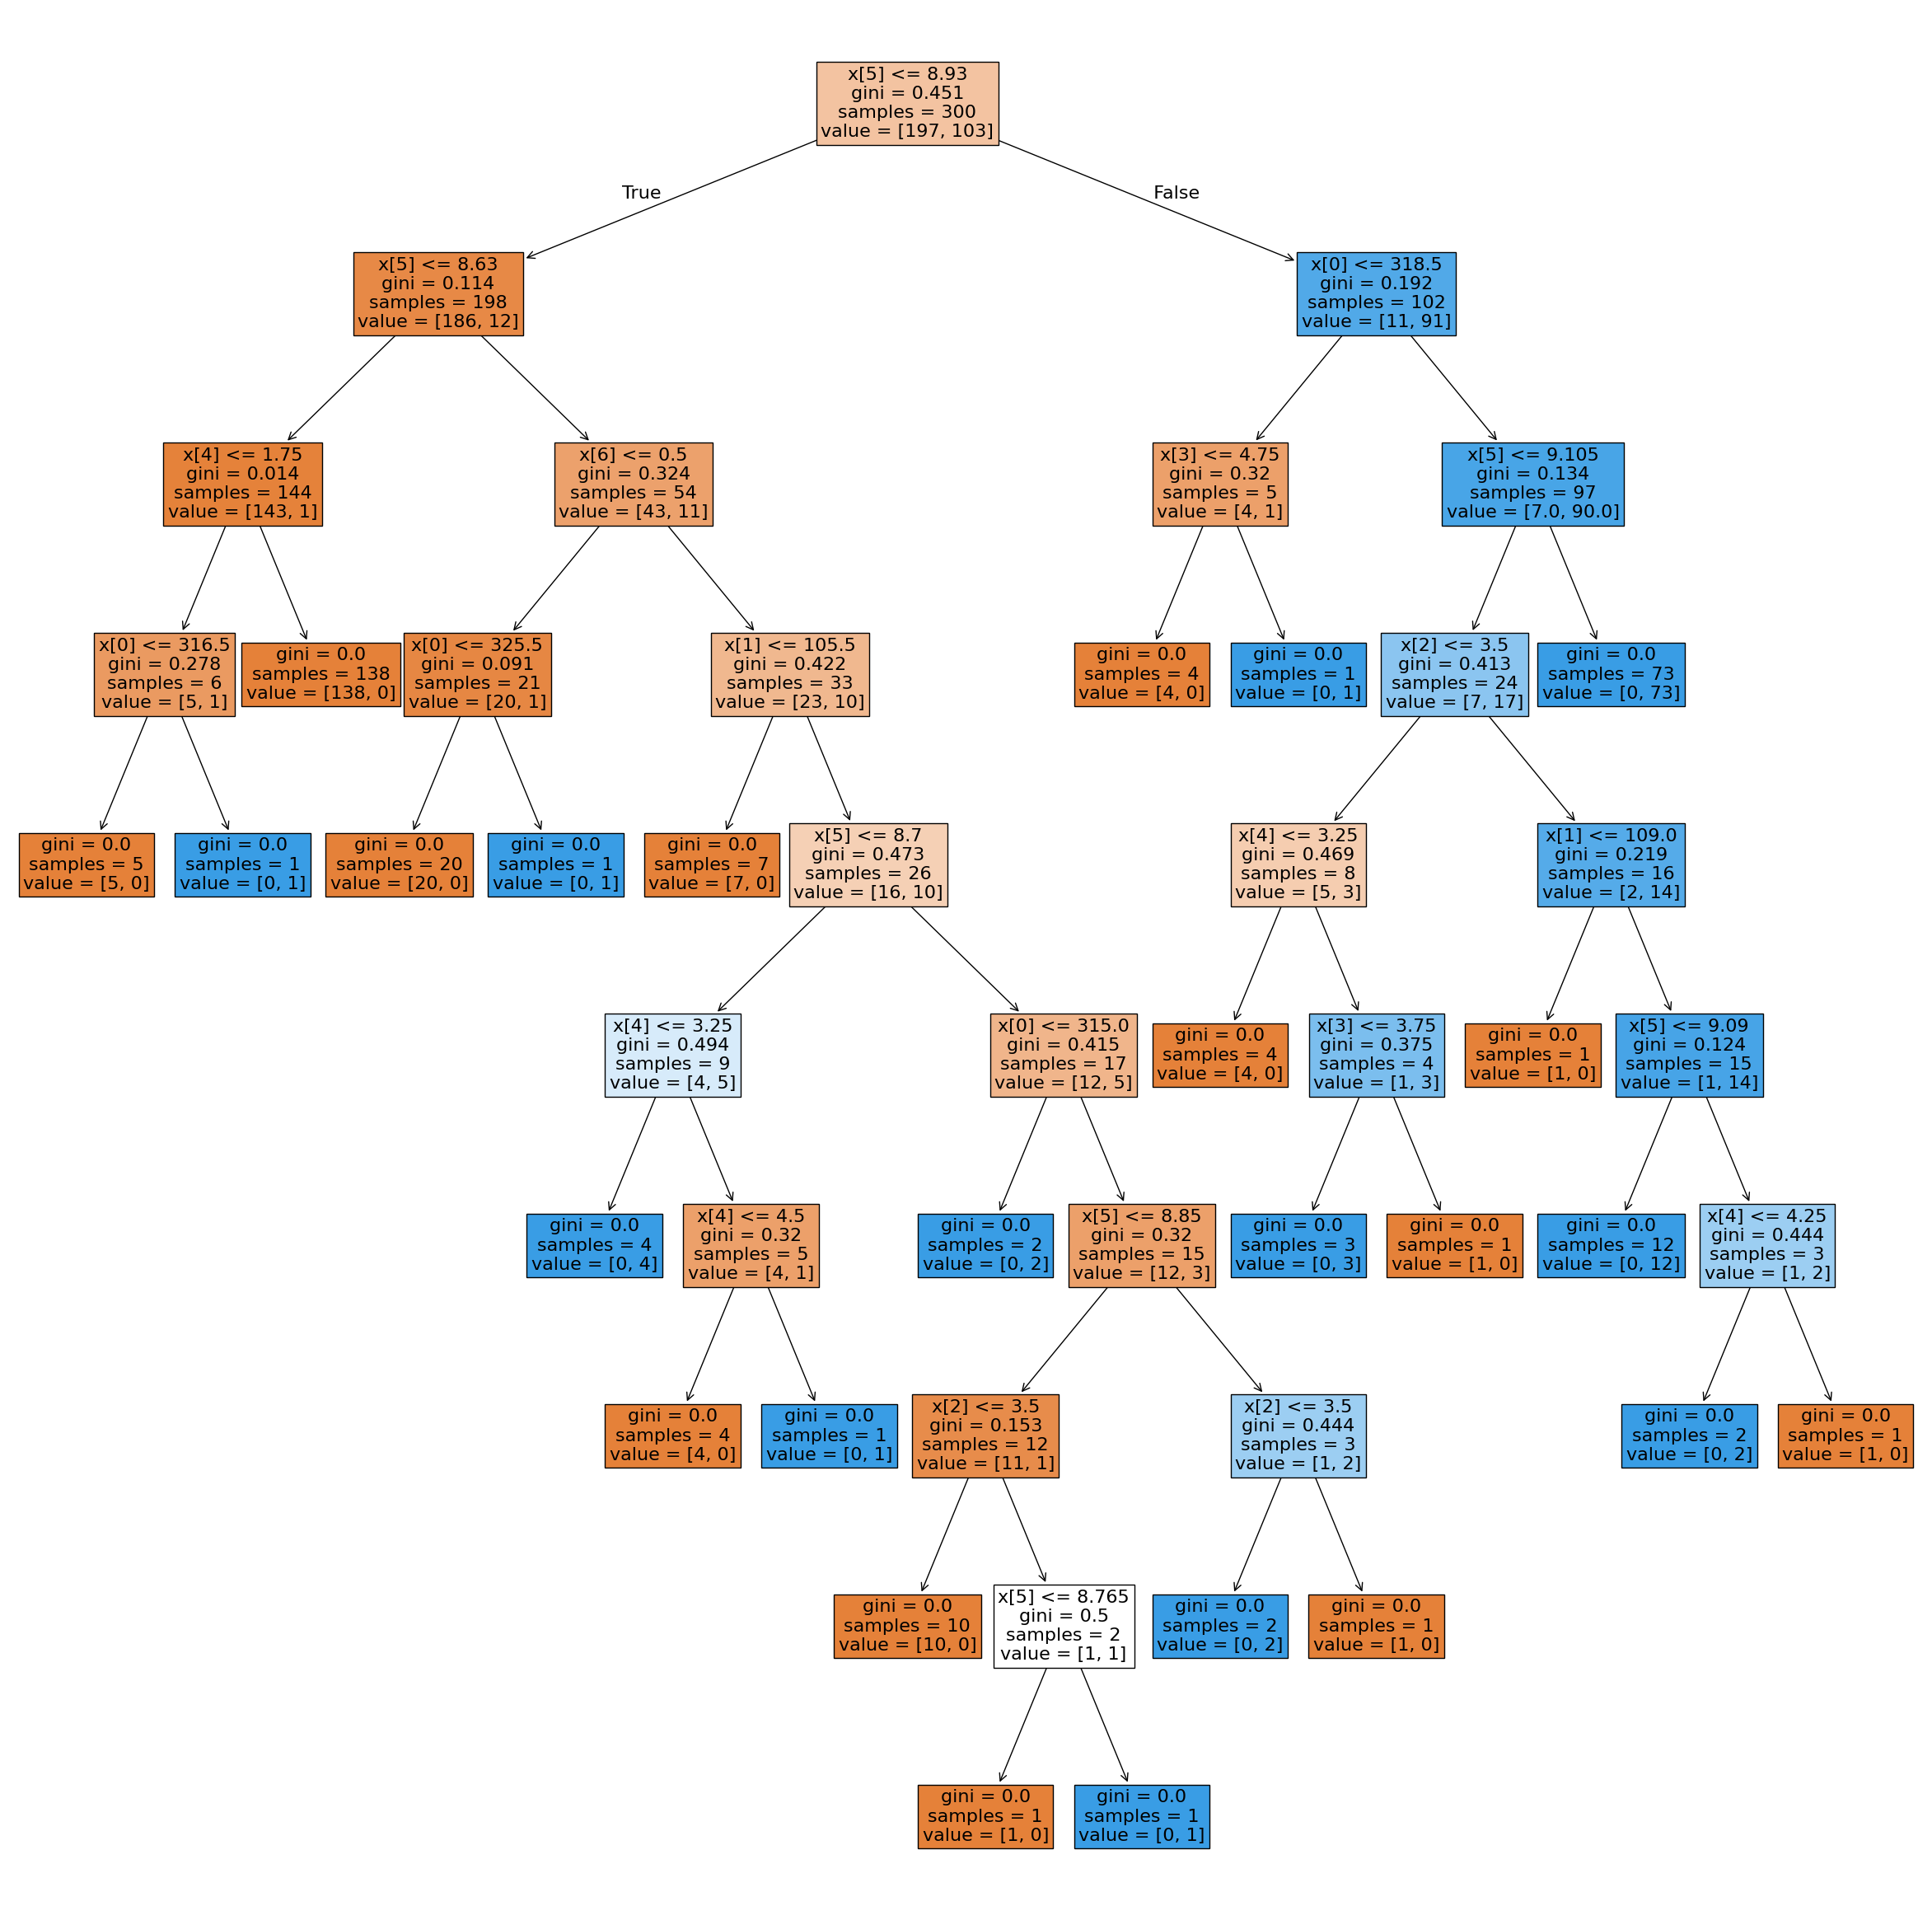

In [116]:
# Decision Tree Visualization

plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=16)
plt.show()